<a href="https://colab.research.google.com/github/Chutki319239/ELEVATE-AI-ML-task8-clustering-with-k-means/blob/main/ElevateAI_ML_Task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.pipeline import Pipeline

import joblib # Import joblib

os.makedirs('plots', exist_ok=True)

In [2]:
df = pd.read_csv("Mall_Customers.csv")

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())


Shape: (200, 5)
Columns: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Drop ID column (not useful for clustering)
if 'CustomerID' in df.columns:
    df = df.drop(columns=['CustomerID'])

# Select features for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']  # main 2D features
X = df[features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


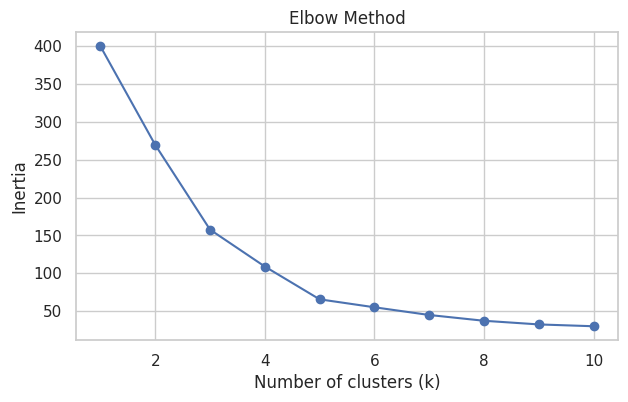

In [4]:
inertias = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


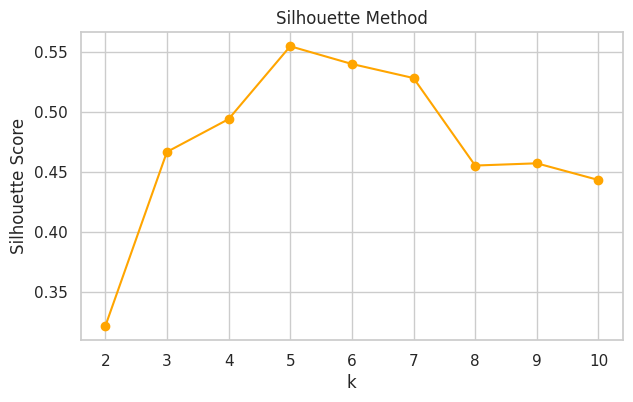

Best k (Silhouette): 5


In [5]:
sil_scores = []
K_range2 = range(2, 11)

for k in K_range2:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

plt.figure(figsize=(7,4))
plt.plot(list(K_range2), sil_scores, marker='o', color='orange')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

best_k = K_range2[np.argmax(sil_scores)]
print("Best k (Silhouette):", best_k)


In [6]:
final_k = 5   # usually 5 clusters for this dataset (you can use best_k)
kmeans = KMeans(n_clusters=final_k, random_state=42, n_init=20)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("Cluster sizes:\n", df['Cluster'].value_counts())
df.to_csv("Mall_Customers_with_clusters.csv", index=False)


Cluster sizes:
 Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


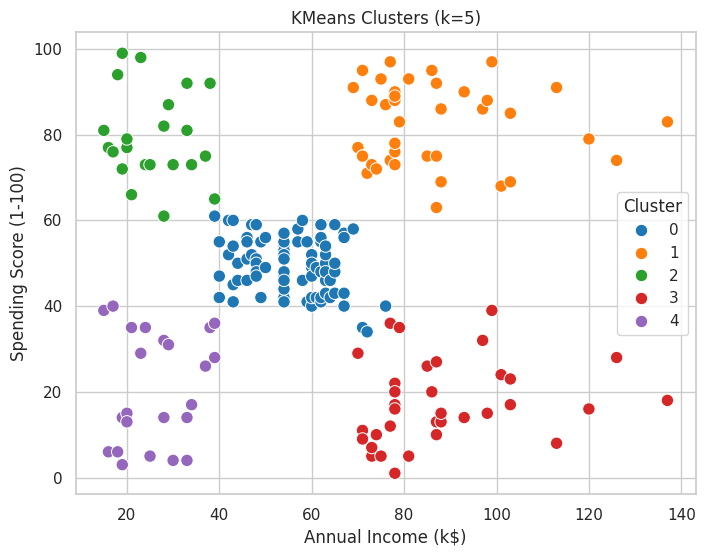

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', data=df, palette='tab10', s=80)
plt.title(f"KMeans Clusters (k={final_k})")
plt.legend(title="Cluster")
plt.show()


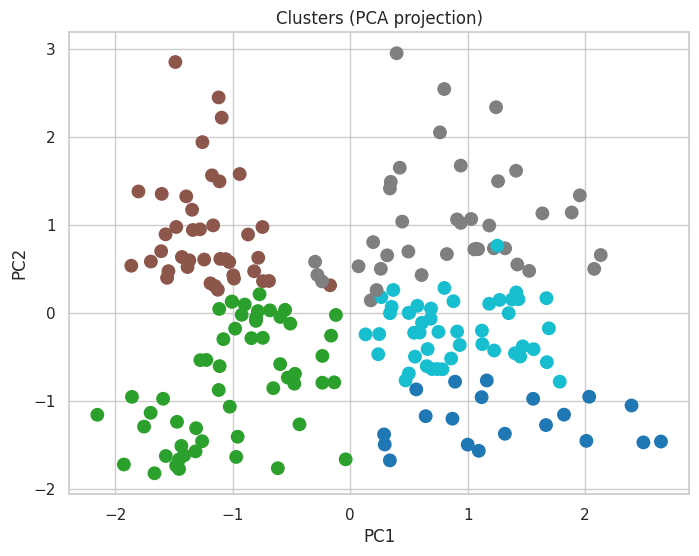

In [8]:
X_all = df[['Age','Annual Income (k$)','Spending Score (1-100)']]
X_scaled_all = scaler.fit_transform(X_all)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled_all)

kmeans_all = KMeans(n_clusters=final_k, random_state=42, n_init=20)
labels_all = kmeans_all.fit_predict(X_scaled_all)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_all, cmap='tab10', s=80)
plt.title("Clusters (PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [9]:
profile = df.groupby('Cluster')[features].mean().round(1)
profile['Count'] = df['Cluster'].value_counts().sort_index()
print("Cluster Profiles:\n")
display(profile)


Cluster Profiles:



,Annual Income (k$),Spending Score (1-100),Count
Cluster,,,
0,55.3,49.5,81
1,86.5,82.1,39
2,25.7,79.4,22
3,88.2,17.1,35
4,26.3,20.9,23


In [12]:
joblib.dump(kmeans, "mall_kmeans.joblib")
print("Model saved as mall_kmeans.joblib")

Model saved as mall_kmeans.joblib
